In [1]:
%pylab inline

import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import scanpy as sc
import pandas as pd
import matplotlib
import pickle
import scipy
import time
import os
import warnings
warnings.filterwarnings("ignore")

from collections import namedtuple
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
sns.set_style('ticks')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
patch_data = pd.read_excel('../patchSeqMappingTo10X/data/Ins_patchSeq_new.xlsx')
patch_data

,gene_order,cellName,s173,s174,s175,s177,s209,s210,s211,s212,...,n87,n88,n89,n8,n90,n91,n92,n94,n96,n9
0,"""""",cellType,VEN,VEN,PC,NaN,INTER,PC,VEN,PC,...,NaN,INTER,INTER,NaN,VEN,INTER,NaN,INTER,INTER,NaN
1,"""""",cellSubtype,VEN_Long,VEN_Long,PC_L5,NaN,INTER_L5,PC_L6,VEN_Long,PC_L5,...,NaN,INTER_L5,INTER_L5,NaN,VEN_Short,L23_INTER,NaN,L23_INTER,L23_INTER,NaN
2,"""""",MappingRate,0.8957,0.7971,0.8867,0.8785,0.8207,0.7865,0.8871,0.8337,...,0.8258,0.865,0.7652,0.76,0.8734,0.8053,0.8213,0.8197,0.751,0.2173
3,"""""",batch,batch-1,batch-1,batch-1,batch-1,batch-1,batch-1,batch-1,batch-1,...,batch-5,batch-5,batch-5,batch-5,batch-5,batch-5,batch-5,batch-5,batch-5,batch-5
4,"""""",# of Total Reads,2286636.72,7547298.05,4096627.48,9263391.89,4834936.14,6305879.98,4812780.15,5636087.57,...,2101502.04,1740485.41,3306850.15,1721003.1,569116.48,3291647.51,2750171.7,4211850.26,1653226.49,1322817.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16460,16456,ZXDC,0,0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16461,16457,ZYG11A,0,0,0,0,18,0,0,50,...,0,0,3,0,0,0,30,0,0,0
16462,16458,ZYG11B,1,15,36,213,160,259,328,124,...,92,522,283,33,3,0,441,105,6,0
16463,16459,ZYX,1,275,131,2163,615,35,164,337,...,0,0,634,0,0,76,126,136,0,230


In [3]:
genes = patch_data['cellName'][5:]
genes

5           A1BG
6            A2M
7          A2ML1
8        A3GALT2
9         A4GALT
          ...   
16460       ZXDC
16461     ZYG11A
16462     ZYG11B
16463        ZYX
16464      ZZEF1
Name: cellName, Length: 16460, dtype: object

In [4]:
patch_data = patch_data.drop('gene_order',axis=1)

patch_data=patch_data.iloc[:,1:].loc[:,patch_data.iloc[2,1:] >= 0.4]
patch_data = patch_data.drop([0,1,2,3,4],axis=0)
patch_data

,s173,s174,s175,s177,s209,s210,s211,s212,s213,s214,...,n86,n87,n88,n89,n8,n90,n91,n92,n94,n96
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,139,0,0,0,5,180,0,0,0,0,...,4,230,0,0,380,4,674,592,0,114
7,0,0,0,0,0,0,0,0,107,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,109,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16460,0,0,4,0,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
16461,0,0,0,0,18,0,0,50,4,0,...,0,0,0,3,0,0,0,30,0,0
16462,1,15,36,213,160,259,328,124,93,26,...,0,92,522,283,33,3,0,441,105,6
16463,1,275,131,2163,615,35,164,337,14,701,...,0,0,0,634,0,0,76,126,136,0


In [5]:
patch_data=patch_data.set_index(genes)
patch_data

,s173,s174,s175,s177,s209,s210,s211,s212,s213,s214,...,n86,n87,n88,n89,n8,n90,n91,n92,n94,n96
cellName,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,139,0,0,0,5,180,0,0,0,0,...,4,230,0,0,380,4,674,592,0,114
A2ML1,0,0,0,0,0,0,0,0,107,0,...,0,0,0,0,0,0,0,0,0,0
A3GALT2,0,0,0,0,0,109,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXDC,0,0,4,0,0,0,0,0,13,0,...,0,0,0,0,0,0,0,0,0,0
ZYG11A,0,0,0,0,18,0,0,50,4,0,...,0,0,0,3,0,0,0,30,0,0
ZYG11B,1,15,36,213,160,259,328,124,93,26,...,0,92,522,283,33,3,0,441,105,6


In [6]:
patch_data = patch_data.loc[np.sum(patch_data>0,axis=1) > 50 ]

In [7]:
patch_data_t = patch_data
genes = patch_data.index
cells = patch_data.columns

In [8]:
scalarFit = StandardScaler()
patch_data_t = scalarFit.fit_transform(patch_data_t)

In [9]:
patch_data_t

array([[-0.076269  , -0.25272024, -0.29311974, ...,  0.34922209,
        -0.29777098, -0.03144729],
       [ 0.25851695, -0.11892513, -0.28996428, ..., -0.2536134 ,
        -0.29698565, -0.13714382],
       [ 0.49881627,  0.68273673,  0.73713612, ..., -0.25463343,
        -0.22552103, -0.13714382],
       ...,
       [-0.23724622, -0.24717624, -0.26472065, ...,  0.19519813,
        -0.2153118 , -0.13158085],
       [-0.23724622, -0.15108031, -0.18977861, ..., -0.12611012,
        -0.19096671, -0.13714382],
       [ 0.18152784, -0.11264193,  0.27801751, ..., -0.05674834,
        -0.29777098, -0.13714382]])

In [10]:
patch_data_t = pd.DataFrame(patch_data_t,index=genes,columns=cells)
patch_data_t

,s173,s174,s175,s177,s209,s210,s211,s212,s213,s214,...,n86,n87,n88,n89,n8,n90,n91,n92,n94,n96
cellName,,,,,,,,,,,,,,,,,,,,,
A2M,-0.076269,-0.252720,-0.293120,-0.294350,-0.263581,-0.164653,-0.215546,-0.319159,-0.349493,-0.309127,...,-0.135823,0.056358,-0.150683,-0.257442,0.336997,-0.237976,0.324725,0.349222,-0.297771,-0.031447
AAAS,0.258517,-0.118925,-0.289964,-0.285259,-0.266651,-0.240258,-0.215546,-0.146841,-0.349493,-0.302031,...,-0.140098,-0.269356,-0.150683,-0.257442,-0.234316,-0.258330,-0.255273,-0.253613,-0.296986,-0.137144
AACS,0.498816,0.682737,0.737136,1.501139,-0.157980,0.012320,0.568197,-0.141221,1.159970,0.507552,...,-0.140098,0.430220,-0.150683,0.253717,0.517412,0.408278,-0.254412,-0.254633,-0.225521,-0.137144
AADAT,-0.238413,-0.247176,-0.050150,-0.294000,-0.266651,-0.240680,-0.215546,-0.319159,-0.349493,-0.285903,...,-0.037486,-0.269356,-0.150683,-0.257442,-0.032853,-0.258330,-0.255273,-0.254633,-0.297771,-0.137144
AAGAB,-0.213916,-0.003980,0.014537,0.464406,-0.195432,-0.142268,0.216008,0.320168,0.716391,0.248873,...,-0.141524,0.690791,-0.150683,0.412323,0.633178,-0.258330,0.123361,0.960218,0.346196,-0.137144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWINT,-0.210417,-0.252720,-0.293120,-0.294350,-0.266651,-0.240680,-0.215546,-0.318535,-0.268927,-0.289129,...,-0.141524,-0.269356,-0.150683,-0.257442,-0.234316,-0.258330,-0.255273,-0.254633,-0.264787,-0.137144
ZYG11A,-0.238413,-0.252720,-0.293120,-0.294350,-0.255599,-0.240680,-0.215546,-0.287942,-0.345789,-0.309127,...,-0.141524,-0.269356,-0.150683,-0.254856,-0.234316,-0.258330,-0.255273,-0.224033,-0.297771,-0.137144
ZYG11B,-0.237246,-0.247176,-0.264721,-0.219873,-0.168418,-0.131286,-0.052845,-0.241741,-0.263371,-0.292354,...,-0.141524,-0.139070,0.354635,-0.013500,-0.184702,-0.243064,-0.255273,0.195198,-0.215312,-0.131581


In [11]:
# load the predicted cluster IDs of patchSeq cells.
predictClusterIDs = pd.read_csv('../patchSeqMappingTo10X/data/mappingRes/results_Ext.csv',index_col=0)

In [12]:
# import the morh data.
dataMorph = pd.read_csv('./dataMorph/morphFeatMatrix.csv',index_col=0)
dataMorph = dataMorph.drop('cellTypeID',axis=1)
dataMorph

,allBasalDenLen,apicalLen,axonDist,axonLen,centroid_allBasalDenY,centroid_apicalY,centroid_axonY,height,lengthFractionAboveSoma_apical,lengthFractionAboveSoma_axon,...,totalApicalVolume,totalAxonLength,totalAxonVolume,totalBasalLength,totalBasalSurfaceArea,totalBasalVolume,totalLen,totalSurfaceArea,totalVolume,totalAxonSurfaceArea
B112,1573.569723,2471.737105,2.492281,679.656167,-40.073408,182.565365,-81.289321,784.30,0.954818,0.02353,...,1452.852726,679.656132,112.952230,1573.569670,3379.445353,627.588079,4724.962995,10413.655551,2229.522436,982.193300
B15,768.102720,2121.989931,0.919874,179.515596,-18.156018,215.944276,-75.341351,683.30,1.000000,0.00000,...,1153.040061,179.515594,92.504333,768.102694,1970.483373,435.120017,3069.608247,7801.776757,1711.248169,456.811553
B154,3573.866010,2851.954476,0.000000,189.843234,-65.531695,129.438833,-72.495039,48.57,1.000000,0.00000,...,8388.612917,189.837616,279.842268,3573.845681,20466.481440,9415.182072,6615.663719,38444.124952,18318.863781,817.057703
B224,1184.024662,598.342024,0.000000,237.092296,46.424543,-20.543718,-63.791752,73.11,0.138517,0.00000,...,400.311993,237.092293,88.655462,1184.024666,3211.915594,1066.233344,2019.458982,5419.707400,1584.784306,513.944696
B55,967.222799,2026.918673,0.000000,47.808631,-33.121463,270.450831,-19.206011,794.80,1.000000,0.00000,...,1154.282421,47.808636,12.631419,967.222775,2584.927087,581.908382,3041.950102,7672.768624,1759.702103,87.113241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s722,1390.448694,1203.991459,0.000000,121.033303,-80.376683,127.456794,-57.690645,681.25,0.992922,0.00000,...,1082.225143,121.033295,45.257749,1390.448693,3692.432813,884.374916,2715.473456,7828.057061,2050.223439,262.363755
s725,2161.712022,2429.440311,0.000000,66.087886,-67.492119,367.272940,-32.398086,1243.40,1.000000,0.00000,...,2316.335561,66.087875,48.232372,2161.712045,4739.931023,874.023682,4657.240219,11984.399768,3257.442440,189.744714
s727,3309.298558,4598.691892,0.000000,112.109683,-74.294985,308.267710,-50.322418,1253.20,0.950877,0.00000,...,4578.785066,112.109673,88.453375,3309.298612,6698.096619,1170.862221,8020.100133,20223.157877,7778.147988,347.307096
s732,4575.900822,2557.163073,NaN,NaN,8.578133,199.092911,NaN,656.86,1.000000,NaN,...,1461.848069,0.000000,0.000000,4575.900916,8849.595514,1460.721038,NaN,14831.570436,2951.127988,0.000000


In [13]:
morphFeatValues = dataMorph
patch_data_t = patch_data_t.transpose()
featureMerged = pd.concat([predictClusterIDs['predictClustersIDs'],morphFeatValues,patch_data_t],axis=1,join='inner',ignore_index=False)

In [14]:
featureMerged = featureMerged.loc[featureMerged['predictClustersIDs'].isin([1,5,15,0,2,7,13,19,3,6,9,11,14,18]),:]
featureMerged

,predictClustersIDs,allBasalDenLen,apicalLen,axonDist,axonLen,centroid_allBasalDenY,centroid_apicalY,centroid_axonY,height,lengthFractionAboveSoma_apical,...,ZSWIM7,ZSWIM8,ZUP1,ZW10,ZWILCH,ZWINT,ZYG11A,ZYG11B,ZYX,ZZEF1
s175,18,1353.528043,1933.309005,0.000000,176.478085,-37.973394,320.838246,-78.193909,1063.01,1.000000,...,-0.293120,-0.129825,-0.020173,-0.293120,-0.292331,-0.293120,-0.293120,-0.264721,-0.189779,0.278018
s177,14,922.877358,1282.386110,0.000000,325.774122,-30.686047,271.678067,-110.547574,828.18,1.000000,...,-0.283511,-0.087703,-0.294350,-0.292951,-0.013226,-0.294350,-0.294350,-0.219873,0.461958,-0.094346
s214,14,1331.354180,5511.498168,0.000000,57.124118,-29.825224,585.263994,-34.390452,1390.15,1.000000,...,-0.309127,0.061153,-0.309127,-0.036255,-0.309127,-0.289129,-0.309127,-0.292354,0.143079,-0.302676
s218,18,1414.592089,2107.441444,0.000000,78.576197,-63.404252,545.230457,-48.168093,1492.29,1.000000,...,-0.290735,0.521616,-0.301771,-0.084986,-0.301771,-0.030593,-0.301771,-0.301771,-0.301771,-0.301377
s219,18,1471.739088,2842.226284,0.000000,30.120031,-33.927622,325.512787,-22.358821,1234.40,1.000000,...,-0.333357,0.097373,-0.306350,-0.239178,-0.153309,-0.113837,-0.322277,-0.144999,0.051668,-0.208016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n78,5,1647.624839,1935.572823,0.000000,309.024639,-28.571879,159.451454,-92.798684,554.69,1.000000,...,-0.234805,-0.292558,-0.292558,-0.292558,-0.292558,-0.292558,-0.292558,0.003250,-0.292558,0.287790
n82,5,2119.480754,1987.967136,0.000000,411.462183,-35.776002,172.065441,-144.232550,578.60,1.000000,...,-0.292293,-0.292293,-0.292293,1.011042,-0.292293,0.917486,-0.285841,-0.279389,-0.292293,2.120813
n83,1,3498.442333,3879.674302,182.856481,519.322857,-45.520702,147.906796,-104.458889,584.93,1.000000,...,-0.137062,-0.137062,-0.137062,-0.136628,-0.137062,-0.137062,-0.137062,-0.137062,0.515313,-0.137062
n85,1,684.799876,1793.336357,0.000000,33.012069,-33.871922,142.809234,-13.173403,451.29,1.000000,...,-0.280176,-0.280176,-0.280176,-0.273832,-0.280176,0.318734,-0.280176,-0.280176,-0.280176,-0.280176


In [15]:
morphName = 'somaSize'
corrco = []

featureMerged_t = featureMerged[~isnan(featureMerged[morphName]) ]
# featureMerged_t = featureMerged_t[featureMerged_t[morphName]<0.4]
for gene in patch_data_t.columns:
    # print(gene)
    # featureMerged_t = featureMerged_t[ featureMerged_t[gene]>0.1 ]
    
    corr_tem = corrcoef(featureMerged_t[morphName],featureMerged_t[gene])
    corrco.append( corr_tem[0,1] )
    
corrco_arr = np.array(corrco)
sorted_idx = corrco_arr.argsort()
corrco_arr[corrco_arr.argsort()]

array([-0.32393594, -0.31801926, -0.30352515, ...,  0.42364353,
        0.42700465,  0.44695367])

0.37302397023027806
r using scipy.stats.pearsonr is 0.3730239702302779
0.3925045559375799
r using scipy.stats.pearsonr is 0.39250455593758005
0.35023120765366367
r using scipy.stats.pearsonr is 0.3502312076536638
-0.45183435386972404
r using scipy.stats.pearsonr is -0.45183435386972415


Text(0.5, 1.0, 'EIF1_expres vs somaDepth')

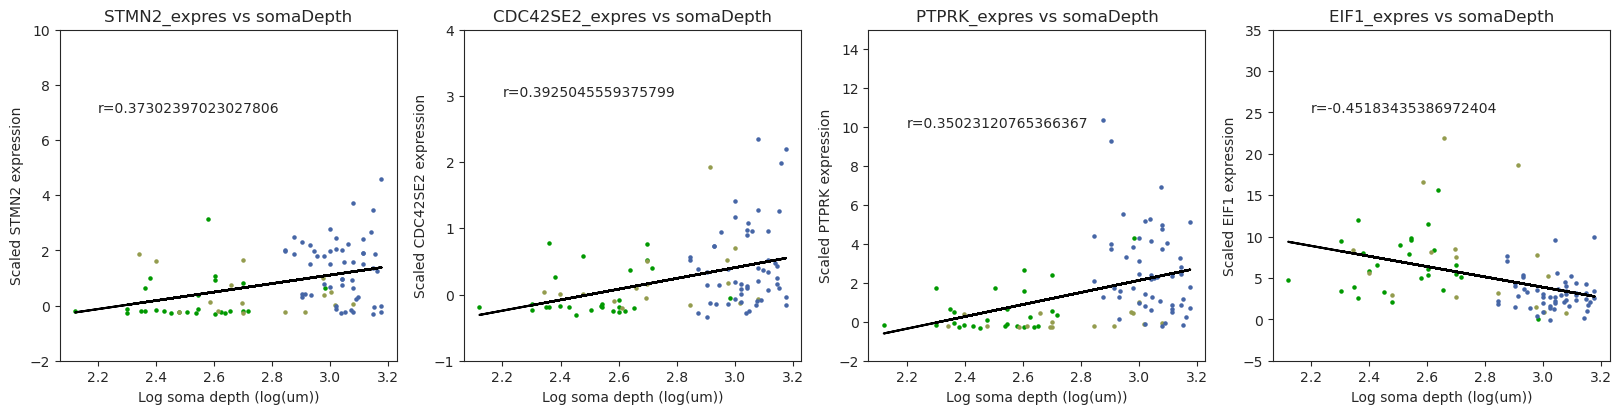

In [16]:
figsize(20,4.3)

subplot(1,4,1)
morphName = 'somaDepth'
gene_t = 'STMN2'
x = log10(featureMerged[morphName])
y = featureMerged[gene_t]
plt.scatter(x[featureMerged['predictClustersIDs'].isin([1,5,15])],y[featureMerged['predictClustersIDs'].isin([1,5,15])],c='#009900',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],y[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],c='#949C4E',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],y[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],c='#4666A6',s=5)
# plt.scatter(x,y)
# plt.xlim([0,0.75])
plt.ylim([-2,10.])
# plt.xscale('log')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='black')

corr_tem = corrcoef(featureMerged_t[morphName],featureMerged_t[gene_t])
print(corr_tem[0,1])

[r_t,p_t] = scipy.stats.pearsonr(featureMerged_t[morphName],featureMerged_t[gene_t])
print(f'r using scipy.stats.pearsonr is {r_t}')

plt.text( 2.2, 7, 'r='+str(corr_tem[0,1]))
plt.xlabel('Log soma depth (log(um))')
plt.ylabel('Scaled STMN2 expression')
plt.title('STMN2_expres vs somaDepth')


subplot(1,4,2)
morphName = 'somaDepth'
gene_t = 'CDC42SE2'
x = log10(featureMerged[morphName])
y = featureMerged[gene_t]
plt.scatter(x[featureMerged['predictClustersIDs'].isin([1,5,15])],y[featureMerged['predictClustersIDs'].isin([1,5,15])],c='#009900',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],y[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],c='#949C4E',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],y[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],c='#4666A6',s=5)   
# plt.scatter(x,y)
# plt.xlim([0,0.75])
plt.ylim([-1,4.])
# plt.xscale('log')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='black')

corr_tem = corrcoef(featureMerged_t[morphName],featureMerged_t[gene_t])
print(corr_tem[0,1])

[r_t,p_t] = scipy.stats.pearsonr(featureMerged_t[morphName],featureMerged_t[gene_t])
print(f'r using scipy.stats.pearsonr is {r_t}')

plt.text( 2.2, 3, 'r='+str(corr_tem[0,1]))
plt.xlabel('Log soma depth (log(um))')
plt.ylabel('Scaled CDC42SE2 expression')
plt.title('CDC42SE2_expres vs somaDepth')

subplot(1,4,3)
morphName = 'somaDepth'
gene_t = 'PTPRK'
x = log10(featureMerged[morphName])
y = featureMerged[gene_t]
plt.scatter(x[featureMerged['predictClustersIDs'].isin([1,5,15])],y[featureMerged['predictClustersIDs'].isin([1,5,15])],c='#009900',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],y[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],c='#949C4E',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],y[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],c='#4666A6',s=5)   
# plt.scatter(x,y)
# plt.xlim([0,0.75])
plt.ylim([-2,15.])
# plt.xscale('log')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='black')

corr_tem = corrcoef(featureMerged_t[morphName],featureMerged_t[gene_t])
print(corr_tem[0,1])
[r_t,p_t] = scipy.stats.pearsonr(featureMerged_t[morphName],featureMerged_t[gene_t])
print(f'r using scipy.stats.pearsonr is {r_t}')


plt.text( 2.2, 10, 'r='+str(corr_tem[0,1]))
plt.xlabel('Log soma depth (log(um))')
plt.ylabel('Scaled PTPRK expression')
plt.title('PTPRK_expres vs somaDepth')


subplot(1,4,4)
morphName = 'somaDepth'
gene_t = 'EIF1'
x = log10(featureMerged[morphName])
y = featureMerged[gene_t]
plt.scatter(x[featureMerged['predictClustersIDs'].isin([1,5,15])],y[featureMerged['predictClustersIDs'].isin([1,5,15])],c='#009900',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],y[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],c='#949C4E',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],y[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],c='#4666A6',s=5)   
# plt.scatter(x,y,c='k')
# plt.xlim([0,0.75])
plt.ylim([-5,35.])
# plt.xscale('log')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='black')

corr_tem = corrcoef(featureMerged_t[morphName],featureMerged_t[gene_t])
print(corr_tem[0,1])

[r_t,p_t] = scipy.stats.pearsonr(featureMerged_t[morphName],featureMerged_t[gene_t])
print(f'r using scipy.stats.pearsonr is {r_t}')

plt.text( 2.2, 25, 'r='+str(corr_tem[0,1]))
plt.xlabel('Log soma depth (log(um))')
plt.ylabel('Scaled EIF1 expression')
plt.title('EIF1_expres vs somaDepth')


# plt.savefig('./figs/genesExp_vs_somaDepth.pdf')

0.44695366883139204
0.4018387785031264
r using scipy.stats.pearsonr is 0.4018387785031261


Text(0.5, 1.0, 'CRIM1_expres vs somasize')

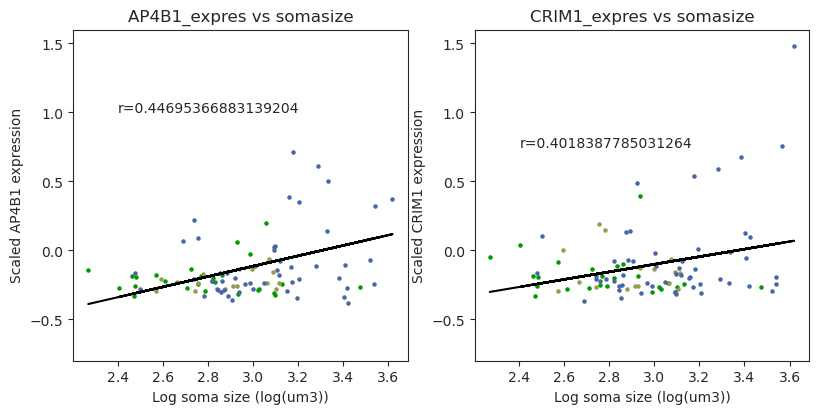

In [17]:
figsize(9.5,4.3)

plt.subplot(1,2,1)
morphName = 'somaSize'
gene_t = 'AP4B1'
x = log10(featureMerged[morphName])
y = featureMerged[gene_t]
plt.scatter(x[featureMerged['predictClustersIDs'].isin([1,5,15])],y[featureMerged['predictClustersIDs'].isin([1,5,15])],c='#009900',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],y[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],c='#949C4E',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],y[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],c='#4666A6',s=5)   
# plt.scatter(x,y)
# plt.xlim([0,0.75])
plt.ylim([-0.8,1.6])
# plt.xscale('log')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='black')

corr_tem = corrcoef(featureMerged_t[morphName],featureMerged_t[gene_t])
print(corr_tem[0,1])

plt.text( 2.4, 1, 'r='+str(corr_tem[0,1]))
plt.xlabel('Log soma size (log(um3))')
plt.ylabel('Scaled AP4B1 expression')
plt.title('AP4B1_expres vs somasize')


plt.subplot(1,2,2)
morphName = 'somaSize'
gene_t = 'CRIM1'
figsize(6,3)
x = log10(featureMerged[morphName])
y = featureMerged[gene_t]
plt.scatter(x[featureMerged['predictClustersIDs'].isin([1,5,15])],y[featureMerged['predictClustersIDs'].isin([1,5,15])],c='#009900',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],y[featureMerged['predictClustersIDs'].isin([0,2,7,13,19])],c='#949C4E',s=5)
plt.scatter(x[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],y[featureMerged['predictClustersIDs'].isin([3,6,9,11,14,18])],c='#4666A6',s=5)   
# plt.scatter(x,y)
# plt.xlim([0,0.75])
plt.ylim([-0.8,1.6])
# plt.xscale('log')
slope, intercept = np.polyfit(x, y, 1)
plt.plot(x, slope * x + intercept, color='black')

corr_tem = corrcoef(featureMerged_t[morphName],featureMerged_t[gene_t])
print(corr_tem[0,1])


[r_t,p_t] = scipy.stats.pearsonr(featureMerged_t[morphName],featureMerged_t[gene_t])
print(f'r using scipy.stats.pearsonr is {r_t}')


plt.text( 2.4, 0.75, 'r='+str(corr_tem[0,1]))
plt.xlabel('Log soma size (log(um3))')
plt.ylabel('Scaled CRIM1 expression')
plt.title('CRIM1_expres vs somasize')

# plt.savefig('./figs/genesExp_vs_somaSize.pdf')

# calculating p-value and FDR

In [18]:
[r_t,p_t] = scipy.stats.pearsonr(featureMerged_t[morphName],featureMerged_t[gene_t])

In [19]:
p_array = [p_t,0.002,0.001,0.333]

In [20]:
from statsmodels.stats.multitest import multipletests
multipletests(p_array, method = 'fdr_bh')

(array([ True,  True,  True, False]),
 array([2.17202758e-04, 2.66666667e-03, 2.00000000e-03, 3.33000000e-01]),
 0.012741455098566168,
 0.0125)

In [21]:
#calculate everything
featureMerged

,predictClustersIDs,allBasalDenLen,apicalLen,axonDist,axonLen,centroid_allBasalDenY,centroid_apicalY,centroid_axonY,height,lengthFractionAboveSoma_apical,...,ZSWIM7,ZSWIM8,ZUP1,ZW10,ZWILCH,ZWINT,ZYG11A,ZYG11B,ZYX,ZZEF1
s175,18,1353.528043,1933.309005,0.000000,176.478085,-37.973394,320.838246,-78.193909,1063.01,1.000000,...,-0.293120,-0.129825,-0.020173,-0.293120,-0.292331,-0.293120,-0.293120,-0.264721,-0.189779,0.278018
s177,14,922.877358,1282.386110,0.000000,325.774122,-30.686047,271.678067,-110.547574,828.18,1.000000,...,-0.283511,-0.087703,-0.294350,-0.292951,-0.013226,-0.294350,-0.294350,-0.219873,0.461958,-0.094346
s214,14,1331.354180,5511.498168,0.000000,57.124118,-29.825224,585.263994,-34.390452,1390.15,1.000000,...,-0.309127,0.061153,-0.309127,-0.036255,-0.309127,-0.289129,-0.309127,-0.292354,0.143079,-0.302676
s218,18,1414.592089,2107.441444,0.000000,78.576197,-63.404252,545.230457,-48.168093,1492.29,1.000000,...,-0.290735,0.521616,-0.301771,-0.084986,-0.301771,-0.030593,-0.301771,-0.301771,-0.301771,-0.301377
s219,18,1471.739088,2842.226284,0.000000,30.120031,-33.927622,325.512787,-22.358821,1234.40,1.000000,...,-0.333357,0.097373,-0.306350,-0.239178,-0.153309,-0.113837,-0.322277,-0.144999,0.051668,-0.208016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n78,5,1647.624839,1935.572823,0.000000,309.024639,-28.571879,159.451454,-92.798684,554.69,1.000000,...,-0.234805,-0.292558,-0.292558,-0.292558,-0.292558,-0.292558,-0.292558,0.003250,-0.292558,0.287790
n82,5,2119.480754,1987.967136,0.000000,411.462183,-35.776002,172.065441,-144.232550,578.60,1.000000,...,-0.292293,-0.292293,-0.292293,1.011042,-0.292293,0.917486,-0.285841,-0.279389,-0.292293,2.120813
n83,1,3498.442333,3879.674302,182.856481,519.322857,-45.520702,147.906796,-104.458889,584.93,1.000000,...,-0.137062,-0.137062,-0.137062,-0.136628,-0.137062,-0.137062,-0.137062,-0.137062,0.515313,-0.137062
n85,1,684.799876,1793.336357,0.000000,33.012069,-33.871922,142.809234,-13.173403,451.29,1.000000,...,-0.280176,-0.280176,-0.280176,-0.273832,-0.280176,0.318734,-0.280176,-0.280176,-0.280176,-0.280176


In [22]:
soma_depth = featureMerged['somaDepth_norm']
soma_depth

s175    0.574018
s177    0.531250
s214    0.668037
s218    0.673575
s219    0.629291
          ...   
n78     0.235294
n82     0.263158
n83     0.327103
n85     0.171642
n86     0.127389
Name: somaDepth_norm, Length: 95, dtype: float64

In [23]:
soma_size = featureMerged['somaSize']
soma_size

s175    2137.912292
s177    1499.811824
s214     695.880266
s218    1239.021437
s219     778.453100
           ...     
n78      614.004770
n82      408.822033
n83      528.999776
n85     1067.382260
n86      185.857767
Name: somaSize, Length: 95, dtype: float64

In [24]:
featureMerged.keys()[59]

'A2M'

In [25]:
featureMerged.keys()[60]

'AAAS'

In [26]:
all_genes = featureMerged.keys()[60:]
all_genes

Index([  'AAAS',   'AACS',  'AADAT',  'AAGAB',   'AAK1',  'AAMDC',   'AAMP',
         'AAR2',   'AARS',  'AARS2',
       ...
       'ZSWIM7', 'ZSWIM8',   'ZUP1',   'ZW10', 'ZWILCH',  'ZWINT', 'ZYG11A',
       'ZYG11B',    'ZYX',  'ZZEF1'],
      dtype='object', length=10920)

In [27]:
[r_t,p_t] = scipy.stats.pearsonr(featureMerged_t[morphName],featureMerged_t[gene_t])

In [28]:
df_corr = pd.DataFrame()
for gene in all_genes:
    [r_t,p_t]= scipy.stats.pearsonr(featureMerged_t['somaSize'],featureMerged_t[gene])
    df_corr.loc['somasize_r',gene] = r_t
    df_corr.loc['somasize_p',gene] = p_t
    
    [r_td,p_td]= scipy.stats.pearsonr(featureMerged_t['somaDepth_norm'],featureMerged_t[gene])
    df_corr.loc['somaDepth_norm_r',gene] = r_td
    df_corr.loc['somaDepth_norm_p',gene] = p_td

In [29]:
FDR_somasize = multipletests(df_corr.loc['somasize_p'], method = 'fdr_bh')
FDR_somadepth = multipletests(df_corr.loc['somaDepth_norm_p'], method = 'fdr_bh')
#for the reason to choose Benjamini/Hochberg, see Hodge paper and https://en.wikipedia.org/wiki/False_discovery_rate
FDR_somasize

(array([False, False, False, ..., False, False, False]),
 array([0.82611208, 0.80526086, 0.94951158, ..., 0.96348539, 0.81316799,
        0.98737004]),
 4.697177098944572e-06,
 4.578754578754579e-06)

In [30]:
FDR_somasize[1]

array([0.82611208, 0.80526086, 0.94951158, ..., 0.96348539, 0.81316799,
       0.98737004])

In [31]:
df_corr.loc['FDR_somasize'] = FDR_somasize[1]
df_corr.loc['FDR_somasize_0.05'] = FDR_somasize[0]

df_corr.loc['FDR_somaDepth'] = FDR_somadepth[1]
df_corr.loc['FDR_somaDepth_0.05'] = FDR_somadepth[0]

In [32]:
sum(df_corr.loc['somasize_p']<0.05)

509

In [33]:
sum(df_corr.loc['somaDepth_norm_p']<0.05)

998

In [34]:
save_ind = ['somasize_r', 'somasize_p', 'somaDepth_norm_r', 'somaDepth_norm_p']
df_corr_save = df_corr.loc[save_ind,:]
df_corr_save

,AAAS,AACS,AADAT,AAGAB,AAK1,AAMDC,AAMP,AAR2,AARS,AARS2,...,ZSWIM7,ZSWIM8,ZUP1,ZW10,ZWILCH,ZWINT,ZYG11A,ZYG11B,ZYX,ZZEF1
somasize_r,-0.094767,0.199694,-0.028680,0.117150,-0.057195,-0.097037,0.111885,-0.083989,0.109522,-0.083077,...,-0.108785,-0.124781,0.177974,-0.019348,0.136735,-0.109432,-0.171268,0.021461,-0.107221,0.006584
somasize_p,0.360976,0.052355,0.782630,0.258213,0.581951,0.349534,0.280377,0.418391,0.290721,0.423479,...,0.294001,0.228269,0.084435,0.852362,0.186400,0.291121,0.097015,0.836452,0.301038,0.949505
somaDepth_norm_r,-0.059441,0.162990,-0.060719,0.111844,-0.217655,-0.053857,-0.007266,0.007887,-0.016469,-0.023945,...,-0.069453,0.143450,0.176389,0.071017,-0.056531,-0.109143,-0.160734,-0.057235,-0.130566,0.043266
somaDepth_norm_p,0.567188,0.114526,0.558872,0.280554,0.034105,0.604205,0.944286,0.939532,0.874138,0.817831,...,0.503627,0.165487,0.087284,0.494044,0.586345,0.292405,0.119699,0.581684,0.207253,0.677176


In [36]:
df_corr_save.to_csv('./resultst_matrix/Corr_df.csv')
df_corr.to_csv('./resultst_matrix/Corr_df_wFDR.csv')

# =======Junk codes....=====